In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [859]:
min_p = 4
max_p = 8

P = 40
df = pd.read_csv(f"results/results_P{P}_ep10_N500_B40_min{min_p}_max{max_p}_g1_L1000.csv")

In [860]:
df.keys()

Index(['P', 'epsilon', 'N', 'budget', 'min_prize', 'max_prize', 'g', 'avg_len',
       'p_0', 'p_1',
       ...
       'k_38_util', 'k_38_egal', 'k_38_nash', 'k_38_comp', 'k_39_winners',
       'k_39_num_winners', 'k_39_util', 'k_39_egal', 'k_39_nash', 'k_39_comp'],
      dtype='object', length=282)

In [861]:
df[["k_1_num_winners", "k_2_num_winners", "k_3_num_winners", "k_4_num_winners", "k_5_num_winners", 
    "k_6_num_winners", "k_7_num_winners", "k_8_num_winners", "k_9_num_winners"]].mean()

k_1_num_winners    7.151
k_2_num_winners    7.150
k_3_num_winners    7.152
k_4_num_winners    7.147
k_5_num_winners    7.149
k_6_num_winners    7.148
k_7_num_winners    7.141
k_8_num_winners    7.154
k_9_num_winners    7.142
dtype: float64

In [862]:
df[["k_1_egal", "k_2_egal", "k_3_egal", "k_4_egal", "k_5_egal", 
    "k_6_egal", "k_7_egal", "k_8_egal", "k_9_egal"]]

,k_1_egal,k_2_egal,k_3_egal,k_4_egal,k_5_egal,k_6_egal,k_7_egal,k_8_egal,k_9_egal
0,0.102356,0.127610,0.116787,0.118164,0.118164,0.125265,0.125265,0.125265,0.125265
1,0.124500,0.125647,0.125647,0.124500,0.126819,0.140523,0.140523,0.140523,0.140523
2,0.110775,0.102283,0.127645,0.115121,0.102283,0.115121,0.109057,0.115121,0.109057
3,0.126883,0.126883,0.126883,0.129888,0.126883,0.125088,0.125088,0.125088,0.125088
4,0.165395,0.167465,0.167465,0.167465,0.164252,0.167465,0.167465,0.167465,0.167465
...,...,...,...,...,...,...,...,...,...
995,0.120014,0.116272,0.095763,0.109044,0.125278,0.125278,0.123945,0.123945,0.125278
996,0.132156,0.111232,0.132156,0.119481,0.127944,0.136155,0.098943,0.098943,0.136890
997,0.152657,0.156851,0.156851,0.127847,0.127847,0.127847,0.152657,0.152657,0.152657
998,0.114113,0.114113,0.111789,0.111789,0.111789,0.111789,0.114113,0.114113,0.111789


In [863]:
def compare_row(num, r, t, P):
    row = df.iloc[r]
    
    base_val = row.loc[f"k_{num}_{t}"]
    best = True
    worst = True
    
    for i in range(1, P):
        if i == num:
            continue
        val = row.loc[f"k_{i}_{t}"]
        if val > base_val:
            best = False
        if val < base_val:
            worst = False
    if best and not worst:
        return "best"
    if worst and not best:
        return "worst"
    
    return "mid"
    

def compare_all_rows(k_value, t, P):
    best_counter = 0
    worst_counter = 0
    mid_counter = 0
    for i in range(len(df)):
        res = compare_row(k_value, i, t, P)
        
        
        if res == "best":
            best_counter += 1
        if res == "worst":
            worst_counter += 1
        if res == "mid":
            mid_counter += 1
            
    return best_counter, worst_counter, mid_counter

def compare_all(t, P):
    best_list = []
    worst_list = []
    mid_list = []

    for i in range(1, P):
        best, worst, mid = compare_all_rows(i, t, P)

        print(f"k_{i} => best: {best}, worst: {worst}, mid: {mid}")
        best_list.append(best)
        worst_list.append(worst)
        mid_list.append(mid)
    
    return np.array(best_list), np.array(worst_list), np.array(mid_list)

def plot_single(data, t):
    plt.bar(range(1,P), data)
    plt.xticks(range(1,P))
    plt.xlabel("k-value",fontsize=20)
    plt.ylabel("freqentie", fontsize=20)
    plt.title(f"frequentie that a k-value produced the best {t}", fontsize=20)

    plt.show()

def plot_stacked(best, worst, mid, t, P, mean):
    fig, ax = plt.subplots(figsize=(15,8))

    width = 0.8
    ax.bar(range(1,P), best, width, label='Best', color="green")
    ax.bar(range(1,P), mid, width, bottom=best, label='Middle', color="grey")
    ax.bar(range(1,P), worst, width, bottom=best+mid, label='Worst', color="red")
    
#     ax.vlines(x=mean, ymin=0, ymax=1000, color="blue")

    ax.set_ylabel('Frequency', fontsize=35)
    ax.set_xlabel('k-value', fontsize=35)
    plt.xticks(range(1,P), fontsize=15)
    plt.yticks(range(0,1000,200), fontsize=30)
    
    
    plt.savefig(f"images/stacked_plot_{P}_{min_p}_{max_p}_{t}.png", bbox_inches="tight")

    plt.show()



In [864]:
mean = float(df[["avg_len"]].mean())
print(f"mean: {mean:.2f}")

mean: 0.00


In [865]:
t = 'util'

best, worst, mid = compare_all(t, P)

k_1 => best: 95, worst: 128, mid: 777
k_2 => best: 146, worst: 47, mid: 807
k_3 => best: 183, worst: 23, mid: 794
k_4 => best: 179, worst: 20, mid: 801
k_5 => best: 219, worst: 15, mid: 766
k_6 => best: 228, worst: 18, mid: 754
k_7 => best: 233, worst: 21, mid: 746
k_8 => best: 250, worst: 17, mid: 733
k_9 => best: 267, worst: 6, mid: 727
k_10 => best: 267, worst: 15, mid: 718
k_11 => best: 286, worst: 9, mid: 705
k_12 => best: 274, worst: 10, mid: 716
k_13 => best: 289, worst: 12, mid: 699
k_14 => best: 278, worst: 19, mid: 703
k_15 => best: 273, worst: 13, mid: 714
k_16 => best: 276, worst: 10, mid: 714
k_17 => best: 280, worst: 10, mid: 710
k_18 => best: 294, worst: 9, mid: 697
k_19 => best: 284, worst: 7, mid: 709
k_20 => best: 277, worst: 10, mid: 713
k_21 => best: 269, worst: 9, mid: 722
k_22 => best: 265, worst: 12, mid: 723
k_23 => best: 260, worst: 11, mid: 729
k_24 => best: 247, worst: 13, mid: 740
k_25 => best: 230, worst: 15, mid: 755
k_26 => best: 224, worst: 18, mid: 758


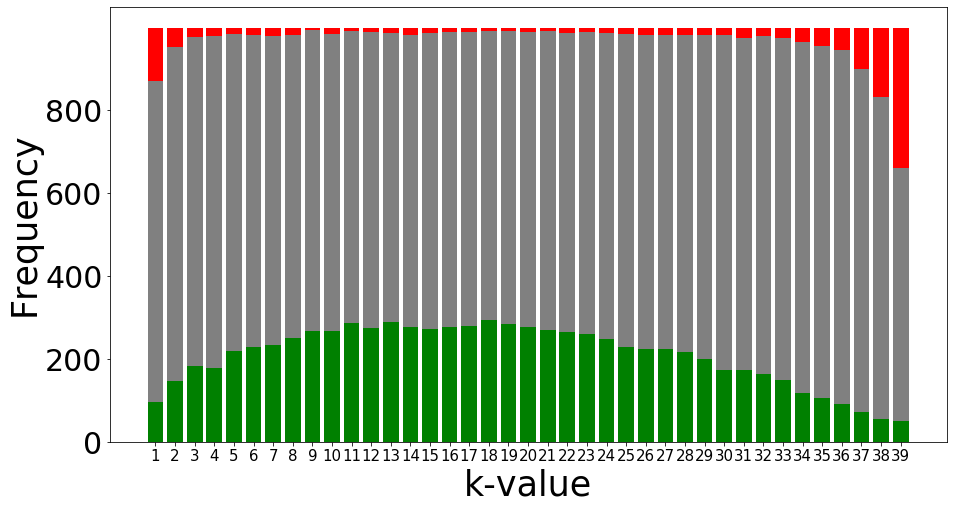

In [866]:
plot_stacked(best, worst, mid, t, P, mean)

In [849]:
t = 'egal'

best, worst, mid = compare_all(t, P)

k_1 => best: 280, worst: 253, mid: 467
k_2 => best: 288, worst: 267, mid: 445
k_3 => best: 306, worst: 249, mid: 445
k_4 => best: 288, worst: 270, mid: 442
k_5 => best: 274, worst: 278, mid: 448
k_6 => best: 295, worst: 263, mid: 442
k_7 => best: 286, worst: 260, mid: 454
k_8 => best: 265, worst: 270, mid: 465
k_9 => best: 266, worst: 284, mid: 450


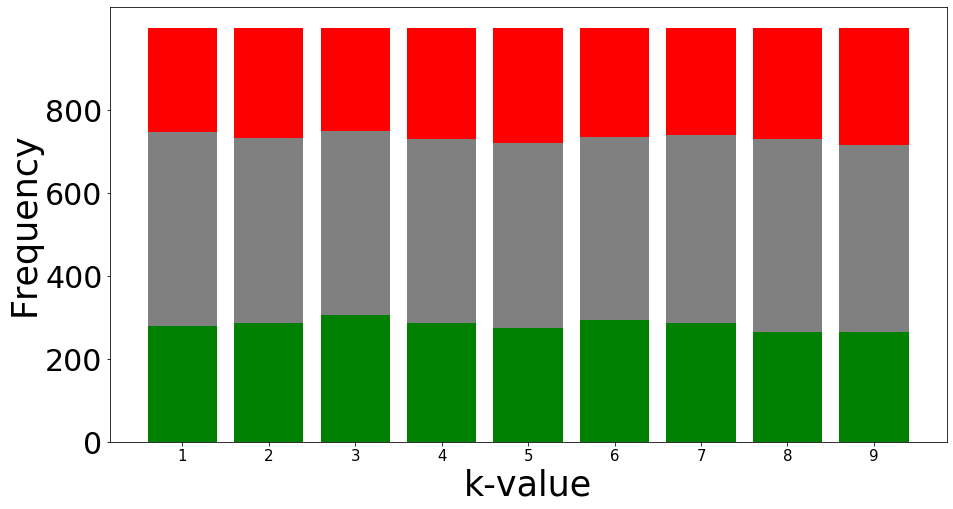

In [850]:
plot_stacked(best, worst, mid, t, P, mean)

In [837]:
t = 'nash'

best, worst, mid = compare_all(t, P)

k_1 => best: 249, worst: 128, mid: 623
k_2 => best: 320, worst: 58, mid: 622
k_3 => best: 368, worst: 36, mid: 596
k_4 => best: 392, worst: 33, mid: 575
k_5 => best: 431, worst: 22, mid: 547
k_6 => best: 452, worst: 23, mid: 525
k_7 => best: 461, worst: 18, mid: 521
k_8 => best: 460, worst: 22, mid: 518
k_9 => best: 469, worst: 21, mid: 510
k_10 => best: 489, worst: 10, mid: 501
k_11 => best: 486, worst: 19, mid: 495
k_12 => best: 494, worst: 11, mid: 495
k_13 => best: 498, worst: 12, mid: 490
k_14 => best: 494, worst: 15, mid: 491
k_15 => best: 496, worst: 15, mid: 489
k_16 => best: 496, worst: 12, mid: 492
k_17 => best: 526, worst: 19, mid: 455
k_18 => best: 519, worst: 10, mid: 471
k_19 => best: 521, worst: 14, mid: 465
k_20 => best: 516, worst: 18, mid: 466
k_21 => best: 496, worst: 18, mid: 486
k_22 => best: 481, worst: 17, mid: 502
k_23 => best: 497, worst: 16, mid: 487
k_24 => best: 471, worst: 16, mid: 513
k_25 => best: 466, worst: 18, mid: 516
k_26 => best: 465, worst: 14, mid

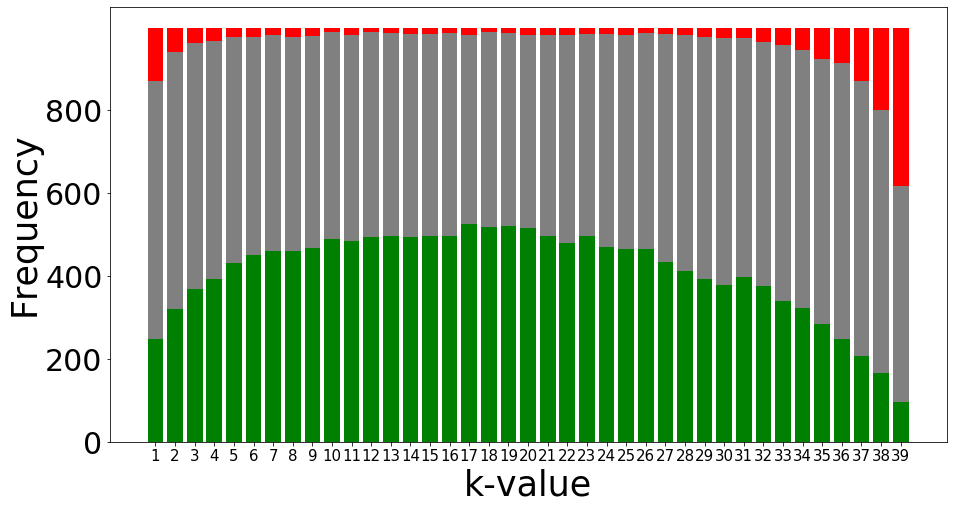

In [838]:
plot_stacked(best, worst, mid, t, P, mean)

In [839]:
t = 'comp'

best, worst, mid = compare_all(t, P)

k_1 => best: 322, worst: 50, mid: 628
k_2 => best: 495, worst: 34, mid: 471
k_3 => best: 438, worst: 37, mid: 525
k_4 => best: 396, worst: 45, mid: 559
k_5 => best: 365, worst: 44, mid: 591
k_6 => best: 348, worst: 48, mid: 604
k_7 => best: 339, worst: 60, mid: 601
k_8 => best: 309, worst: 62, mid: 629
k_9 => best: 297, worst: 75, mid: 628
k_10 => best: 311, worst: 74, mid: 615
k_11 => best: 303, worst: 70, mid: 627
k_12 => best: 288, worst: 71, mid: 641
k_13 => best: 273, worst: 66, mid: 661
k_14 => best: 263, worst: 71, mid: 666
k_15 => best: 250, worst: 76, mid: 674
k_16 => best: 239, worst: 79, mid: 682
k_17 => best: 249, worst: 68, mid: 683
k_18 => best: 237, worst: 74, mid: 689
k_19 => best: 254, worst: 74, mid: 672
k_20 => best: 242, worst: 72, mid: 686
k_21 => best: 231, worst: 80, mid: 689
k_22 => best: 231, worst: 94, mid: 675
k_23 => best: 224, worst: 87, mid: 689
k_24 => best: 207, worst: 85, mid: 708
k_25 => best: 208, worst: 80, mid: 712
k_26 => best: 211, worst: 84, mid:

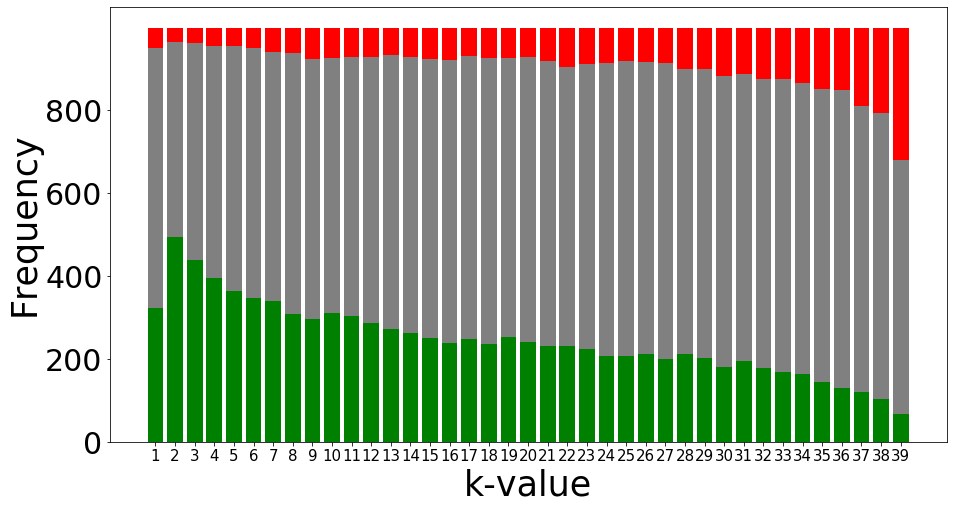

In [840]:
plot_stacked(best, worst, mid, t, P, mean)